### Importando todos os pacotes necessários para iniciar a tarefa de análise e classificação

In [7]:
# Vídeo fonte para a explicação desta análise/predição: https://www.youtube.com/watch?v=F6YyPbyoH9I

import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [8]:
warnings.filterwarnings('ignore')

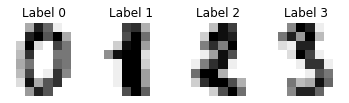

In [9]:
img_and_labels = list(zip(img_digitos.images, img_digitos.target))
for index, (image, label) in enumerate(img_and_labels[:4]):
    plt.subplot(2,4,index+1)
    plt.axis('off')
    plt.imshow(image, cmap= plt.cm.gray_r, interpolation='nearest')
    plt.title('Label %i' % label)

In [11]:
X = img_digitos.data
Y = img_digitos.target

X.shape, Y.shape

((1797, 64), (1797,))

### Classificação com KNN - Pré-processamento e Normalização

In [15]:
# Divisão dos dados para treino e para teste
X_train, test_Data, Y_train, test_Labels = train_test_split(X, Y, test_size=0.25, random_state=42)

In [16]:
#Divisão para treino e para validação
train_Data, valid_Data, train_Labels, valid_Labels = train_test_split(X_train, Y_train, test_size=0.1, random_state=84)

In [17]:
print(f"Exemplos de treino: {len(train_Labels)}")
print(f"Exemplos de validação: {len(valid_Labels)}")
print(f"Exemplos de teste: {len(test_Labels)}")

Exemplos de treino: 1212
Exemplos de validação: 135
Exemplos de teste: 450


In [18]:
# Normalização das imagens pela média

# Média do dataset de treino
X_norm = np.mean(X, axis = 0)

# Normalização dos dados de teste e treino
X_train_norm = train_Data - X_norm
X_valid_norm = valid_Data - X_norm
X_test_norm = test_Data - X_norm

In [20]:
X_train_norm, X_test_norm, X_valid_norm

(array([[ 0.        , -0.30383973,  0.79521425, ..., -5.7640512 ,
         -2.06789093, -0.36449638],
        [ 0.        , -0.30383973,  1.79521425, ...,  9.2359488 ,
         13.93210907,  4.63550362],
        [ 0.        , -0.30383973,  3.79521425, ..., -0.7640512 ,
         -2.06789093, -0.36449638],
        ...,
        [ 0.        , -0.30383973, -3.20478575, ..., -1.7640512 ,
         -2.06789093, -0.36449638],
        [ 0.        , -0.30383973, -5.20478575, ...,  2.2359488 ,
         -2.06789093, -0.36449638],
        [ 0.        ,  0.69616027,  6.79521425, ...,  1.2359488 ,
         -1.06789093, -0.36449638]]),
 array([[ 0.        , -0.30383973, -5.20478575, ...,  7.2359488 ,
          2.93210907, -0.36449638],
        [ 0.        , -0.30383973,  5.79521425, ..., -5.7640512 ,
         -2.06789093, -0.36449638],
        [ 0.        , -0.30383973,  2.79521425, ...,  1.2359488 ,
         -2.06789093, -0.36449638],
        ...,
        [ 0.        ,  0.69616027,  7.79521425, ...,  

### Classificação em KNN - Encontrando o melhor valor de K

In [29]:
# Range de K
K_values = range(1,30,2)

In [30]:
# lista da acurácia para cada valor de K
accuracy = []

In [31]:
for k in K_values:
    modeloKNN = KNeighborsClassifier(n_neighbors=k)
    modeloKNN.fit(train_Data, train_Labels)

    score = modeloKNN.score(valid_Data, valid_Labels)
    print(f'Com o valor de k igual a {k}, a acurácia é: {score*100}')
    accuracy.append(score)

Com o valor de k igual a 1, a acurácia é: 99.25925925925925
Com o valor de k igual a 3, a acurácia é: 99.25925925925925
Com o valor de k igual a 5, a acurácia é: 99.25925925925925
Com o valor de k igual a 7, a acurácia é: 99.25925925925925
Com o valor de k igual a 9, a acurácia é: 99.25925925925925
Com o valor de k igual a 11, a acurácia é: 99.25925925925925
Com o valor de k igual a 13, a acurácia é: 99.25925925925925
Com o valor de k igual a 15, a acurácia é: 99.25925925925925
Com o valor de k igual a 17, a acurácia é: 98.51851851851852
Com o valor de k igual a 19, a acurácia é: 98.51851851851852
Com o valor de k igual a 21, a acurácia é: 97.77777777777777
Com o valor de k igual a 23, a acurácia é: 97.03703703703704
Com o valor de k igual a 25, a acurácia é: 97.77777777777777
Com o valor de k igual a 27, a acurácia é: 97.03703703703704
Com o valor de k igual a 29, a acurácia é: 97.03703703703704


In [32]:
i = np.argmax(accuracy)

In [34]:
print(f"Com k igual a: {K_values[i]}, o valor de acurácia é: {accuracy[i]*100}")

Com k igual a: 1, o valor de acurácia é: 99.25925925925925


In [37]:
model_f = KNeighborsClassifier(n_neighbors=K_values[i])
model_f.fit(train_Data, train_Labels)

KNeighborsClassifier(n_neighbors=1)

In [39]:
predict = model_f.predict(test_Data)

print('Avaliação dos dados de teste')
print(classification_report(test_Labels, predict))

Avaliação dos dados de teste
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       0.98      0.98      0.98        46
           4       0.98      0.98      0.98        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        41
           8       0.97      0.95      0.96        38
           9       0.96      0.94      0.95        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [40]:
# avaliando com a matriz de confusão

print(confusion_matrix(test_Labels, predict))

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  1  0]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  1  0  0  0  0  0  0 36  1]
 [ 0  0  0  1  1  1  0  0  0 45]]


Acho que o dígito é: 9


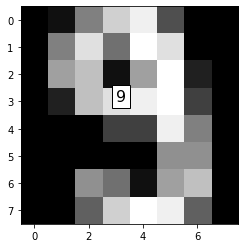

Acho que o dígito é: 4


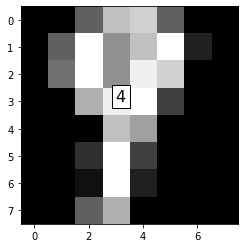

Acho que o dígito é: 4


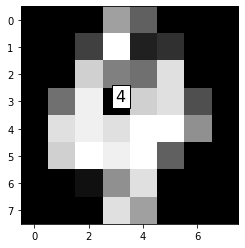

Acho que o dígito é: 2


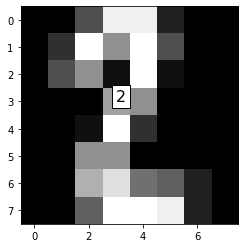

Acho que o dígito é: 5


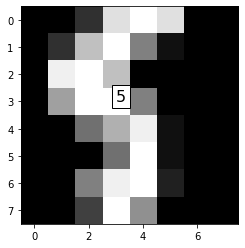

In [41]:
# Fazendo as previsões com os dados de teste

for i in np.random.randint(0, high=len(test_Labels), size=(5,)):
    image = test_Data[i]
    predict = model_f.predict([image])[0]

    imgdata = np.array(image, dtype=float)
    pixels = imgdata.reshape((8,8))
    plt.imshow(pixels, cmap='gray')
    plt.annotate(predict, (3,3), bbox={'facecolor': 'white'}, fontsize=16)
    print("Acho que o dígito é: {}".format(predict))
    plt.show()

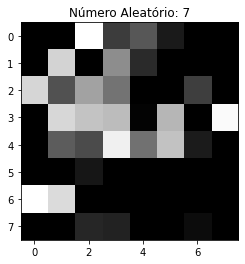

(array([[0.        , 0.        , 0.47393911, 0.11134266, 0.16149478,
         0.04969427, 0.        , 0.        ],
        [0.        , 0.39364171, 0.        , 0.26278808, 0.07886951,
         0.        , 0.        , 0.        ],
        [0.39755937, 0.15320818, 0.30100508, 0.21366146, 0.        ,
         0.        , 0.11586766, 0.        ],
        [0.        , 0.40009951, 0.36341465, 0.35059466, 0.00577341,
         0.33865201, 0.        , 0.46532382],
        [0.        , 0.17149042, 0.13950108, 0.44705988, 0.21275179,
         0.36043055, 0.05014972, 0.        ],
        [0.        , 0.        , 0.04157544, 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.47490911, 0.4075379 , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.07173259, 0.06479941, 0.        ,
         0.        , 0.02376859, 0.        ]]),
 7)

In [66]:
# teste para a geração de um código que faça a criação de números aleatórios fora dos dados trazidos via scikit learn

def generate_random_number_image():
    # Gerar um número aleatório de 0 a 9
    random_number = np.random.randint(0, 10)

    # Criar uma matriz 28x28 com valores aleatórios entre 0 e 1
    image_matrix = np.random.rand(8,8)

    # Definir pixels correspondentes ao número aleatório para 1
    image_matrix[image_matrix > 0.5] = 1 if random_number % 2 == 0 else 0

    # # Exibir a imagem gerada
    # plt.imshow(image_matrix, cmap='gray')
    # plt.title(f'Número Aleatório: {random_number}')
    # plt.show()

    return image_matrix, random_number

# Chamar a função para gerar e exibir uma nova imagem a cada vez
generate_random_number_image()


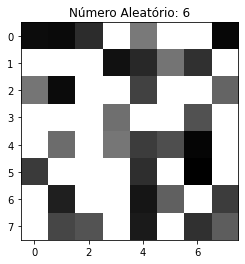

Acho que o dígito é: 1, Verdadeiro: 6


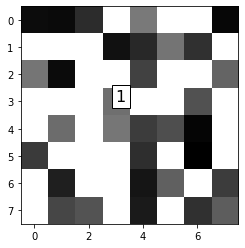

In [67]:
# Gerando as respostas com um número aleatório criado via função Python:

image, true_label = generate_random_number_image()
predict = model_f.predict([image.flatten()])[0]

imgdata = np.array(image, dtype=float)
pixels = imgdata.reshape((8, 8))
plt.imshow(pixels, cmap='gray')
plt.annotate(predict, (3, 3), bbox={'facecolor': 'white'}, fontsize=16)
print("Acho que o dígito é: {}, Verdadeiro: {}".format(predict, true_label))
plt.show()